In [1]:
# Fundamental classes
import numpy as np 
import pandas as pd 
import os

# Image related
import cv2
from PIL import Image
from skimage.transform import resize

# For ploting
import matplotlib.pyplot as plt

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [2]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()
train_path = os.path.join(cur_path, "Final_Training\\Images\\")

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join("Final_Training\\Images\\",str(i).zfill(5))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading as image, filename:", a)

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
# Checking data shape
print(data.shape, labels.shape)

Error loading as image, filename: GT-00000.csv
Error loading as image, filename: GT-00001.csv
Error loading as image, filename: GT-00002.csv
Error loading as image, filename: GT-00003.csv
Error loading as image, filename: GT-00004.csv
Error loading as image, filename: GT-00005.csv
Error loading as image, filename: GT-00006.csv
Error loading as image, filename: GT-00007.csv
Error loading as image, filename: GT-00008.csv
Error loading as image, filename: GT-00009.csv
Error loading as image, filename: GT-00010.csv
Error loading as image, filename: GT-00011.csv
Error loading as image, filename: GT-00012.csv
Error loading as image, filename: GT-00013.csv
Error loading as image, filename: GT-00014.csv
Error loading as image, filename: GT-00015.csv
Error loading as image, filename: GT-00016.csv
Error loading as image, filename: GT-00017.csv
Error loading as image, filename: GT-00018.csv
Error loading as image, filename: GT-00019.csv
Error loading as image, filename: GT-00020.csv
Error loading

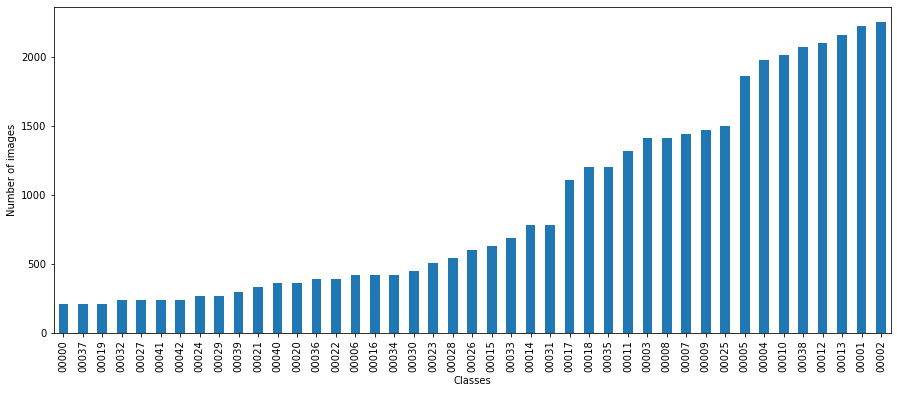

In [3]:
# number of images in each class
data_dic = {}
for folder in os.listdir(train_path):
    # Remve one since there is .csv file in each folder
    data_dic[folder] = len(os.listdir(train_path + '/' + folder)) - 1

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

# Classes percentages accross all the data
data_dic.values()
class_data_num = []
for key in data_dic.keys():
    class_data_num.append(data_dic[key])

In [4]:
from math import floor
from skimage import transform
# Maximum number of inputs for the largest class
max_num_data = round(max(data_df) * 0.9)
# Counter to count 
c = 0
data_new = []
labels_new = []
# Apply image augmentation to balance the data.
for i in range(classes):
    # Starting and Ending position of each class
    start_itr = c
    end_itr = c + class_data_num[i]
    itr = start_itr
    #print("Start at:", start_itr, "End at:", end_itr, "Difference:", end_itr - start_itr, "Real Count:", class_data_num[i])
    # Copying Data
    while(itr < end_itr):
        data_new.append(data[itr])
        labels_new.append(labels[itr])
        itr = itr + 1
        c = c + 1

    # If class is under sampled
    if(class_data_num[i] < max_num_data):
        gen_num = floor( ( (max_num_data/class_data_num[i]) - 1 ) * class_data_num[i])
        # Iterator to iterate of class data images
        itr = 0
        # Swirl strength fator
        sf = 0
        #print(gen_num)
        # Image augmentation Procss
        while(gen_num > 0):
            data_new.append(transform.swirl(data[start_itr + itr], strength=(0.1 + 0.1 * sf), cval = 255))
            labels_new.append(labels[start_itr + itr])                         # start_itr+itr can be replaced with i
            itr = itr + 1
            sf = sf + 1
            gen_num = gen_num - 1
            if(sf > 9):
                sf = 0
            if(itr >= class_data_num[i]):
                itr = 0

# Converting lists into numpy arrays            
data_new = np.array(data_new)
labels_new = np.array(labels_new)
# Checking data shape after balancing
print(data_new.shape)

(87747, 30, 30, 3)


Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42] 

Count Per Class: [2025 2220 2250 2025 2024 2024 2025 2025 2025 2025 2024 2025 2100 2160
 2025 2025 2025 2025 2025 2025 2025 2025 2025 2025 2025 2025 2025 2025
 2025 2025 2025 2025 2025 2025 2025 2025 2025 2025 2070 2025 2025 2025
 2025]


Text(0, 0.5, 'Number of images')

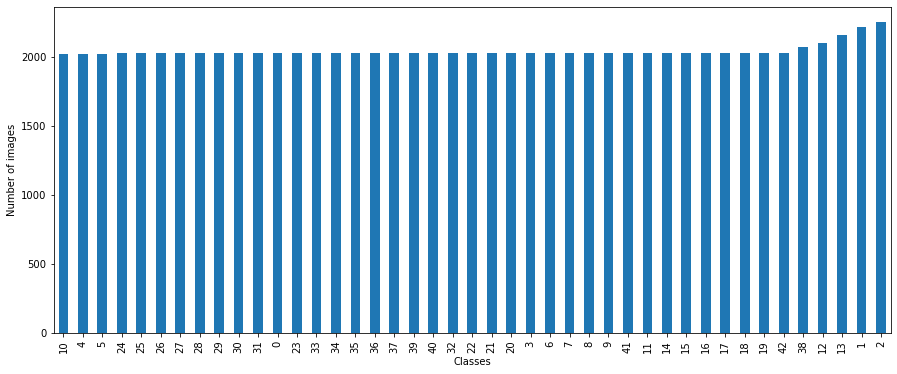

In [5]:
unique, counts = np.unique(labels_new, return_counts=True)
print("Classes:", unique, "\n")
print("Count Per Class:", counts)
# number of images in each class after image augmentation (Data balancing)
data_dic = {}
for i in range(classes):
    # Remve one since there is .csv file in each folder
    data_dic[i] = counts[i]

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

In [10]:
from sklearn import preprocessing
# Resizing images to fit SVM and RF
data = np.array(data_new)
data.resize(87747,2700)
data = preprocessing.scale(data)
labels = np.array(labels_new).astype(np.float)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.25, random_state=42)

C:\Users\amals\AppData\Local\Temp/ipykernel_7980/1705164705.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = np.array(labels_new).astype(np.float)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
y_pred = model.predict(X_val)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       505
           1       0.83      0.91      0.87       542
           2       0.81      0.83      0.82       539
           3       0.77      0.74      0.76       507
           4       0.81      0.86      0.84       497
           5       0.70      0.86      0.77       519
           6       0.95      0.99      0.97       486
           7       0.77      0.86      0.81       529
           8       0.83      0.89      0.86       454
           9       0.92      0.83      0.87       509
          10       0.90      0.88      0.89       522
          11       0.92      0.76      0.83       494
          12       0.97      0.87      0.92       535
          13       0.94      0.95      0.94       505
          14       0.98      0.88      0.93       510
          15       0.97      0.88      0.92       563
          16       0.94      0.99      0.97       539
          17       0.99    

In [14]:
from sklearn import metrics
print("Training Accuracy:", metrics.accuracy_score(y_pred, y_val))

Training Accuracy: 0.9154852532251447


In [17]:
test = pd.read_csv('GT-final_test.csv')
y_test = test["ClassId"].values

# Retrieving the images and their labels 
path = r"Final_Test\\Images\\"
images = os.listdir(path)

x_test = []

for a in images:
    try:
        image = Image.open(path + '/'+ a)
        image = image.resize((30,30))
        image = np.array(image)
        x_test.append(image)
    except:
        print("Error loading as image, filename:", a)

# Converting lists into numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.resize(12630,2700)
x_test = preprocessing.scale(x_test)
# Checking data shape
print(x_test.shape, y_test.shape)

Error loading as image, filename: GT-final_test.test.csv
(12630, 2700) (12630,)


In [18]:
pred = model.predict(x_test)

In [19]:
print(metrics.accuracy_score(pred, y_test)) 

0.247347585114806


In [20]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.06      0.03      0.04        60
           1       0.40      0.25      0.30       720
           2       0.25      0.14      0.18       750
           3       0.09      0.11      0.10       450
           4       0.15      0.15      0.15       660
           5       0.18      0.25      0.21       630
           6       0.09      0.04      0.06       150
           7       0.11      0.17      0.13       450
           8       0.13      0.14      0.13       450
           9       0.34      0.25      0.29       480
          10       0.20      0.16      0.18       660
          11       0.33      0.21      0.26       420
          12       0.85      0.34      0.48       690
          13       0.90      0.65      0.75       720
          14       0.72      0.09      0.15       270
          15       0.26      0.18      0.21       210
          16       0.14      0.21      0.16       150
          17       0.82    